# LIVER DISEASE PREDICTION

**Importing the Necessary Libraries:**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset:**

In [33]:
patients=pd.read_csv('liver.csv')

In [34]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [35]:
patients.shape

(583, 11)

**So there are 583 rows and 11 columns in our dataset.**

**Let us make the Gender column into numerical format:**

In [36]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [37]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: xlabel='Gender'>

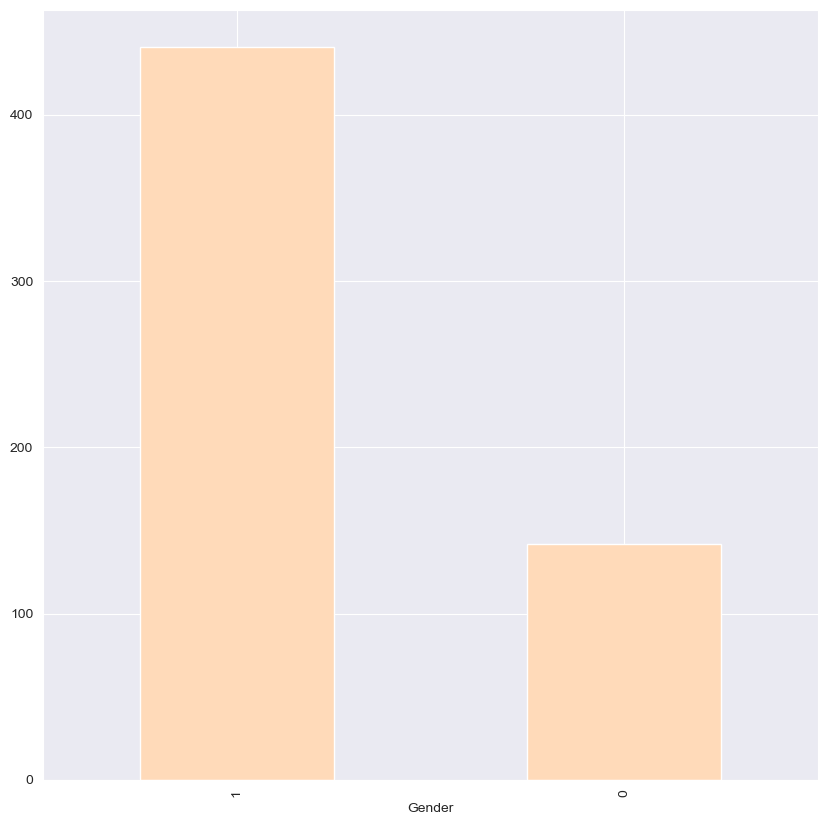

In [38]:
patients['Gender'].value_counts().plot.bar(color='peachpuff')

<Axes: xlabel='Dataset'>

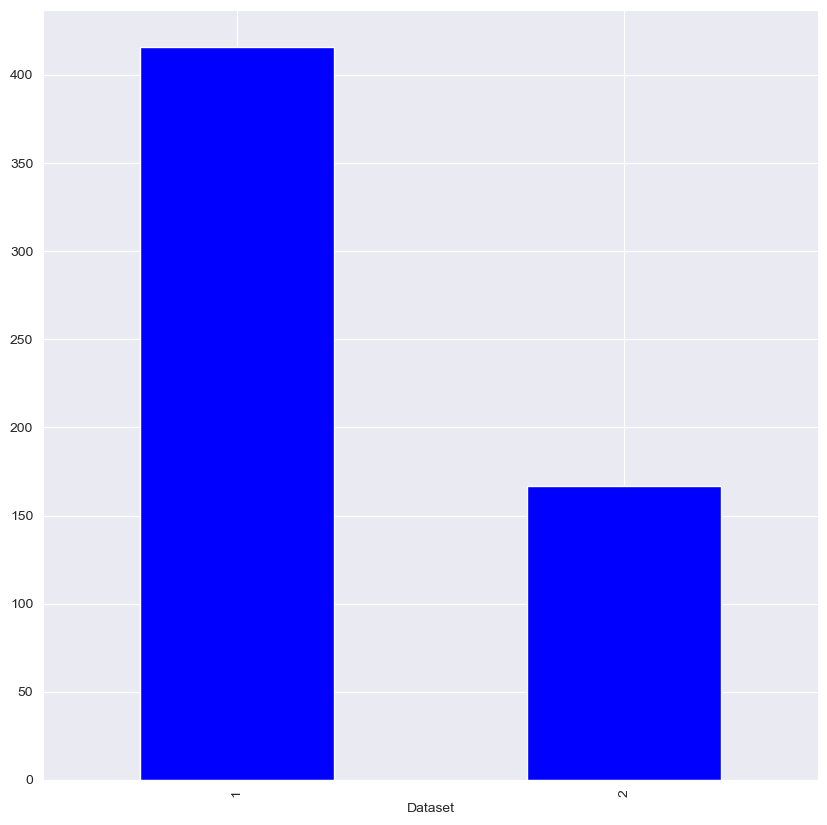

In [39]:
patients['Dataset'].value_counts().plot.bar(color='blue')

**Let us check for the null values:**

In [40]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

**Let us fill these null values by imputing the mean of that column.**

In [41]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [42]:
patients=patients.fillna(0.94)

**Yes! Now we have filled the null values with the mean of that column.** 

In [43]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**Let us check the age group of the patients.**

<Axes: xlabel='Age'>

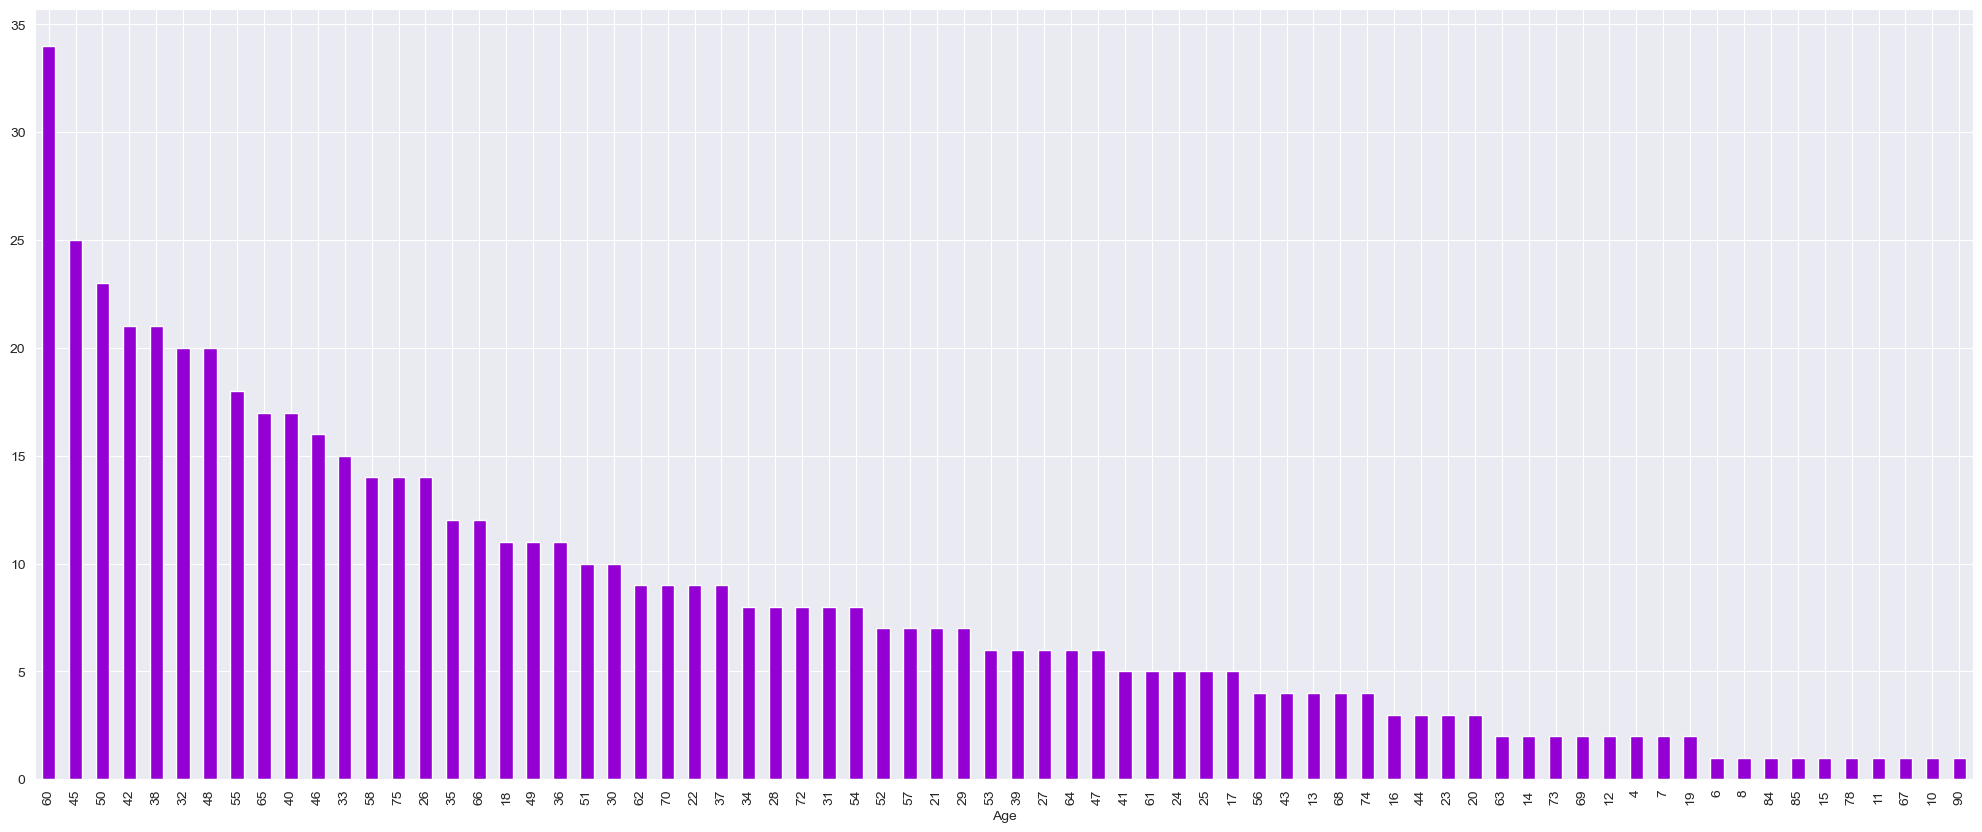

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

**Let us view the pairplot of patients based on Gender.**

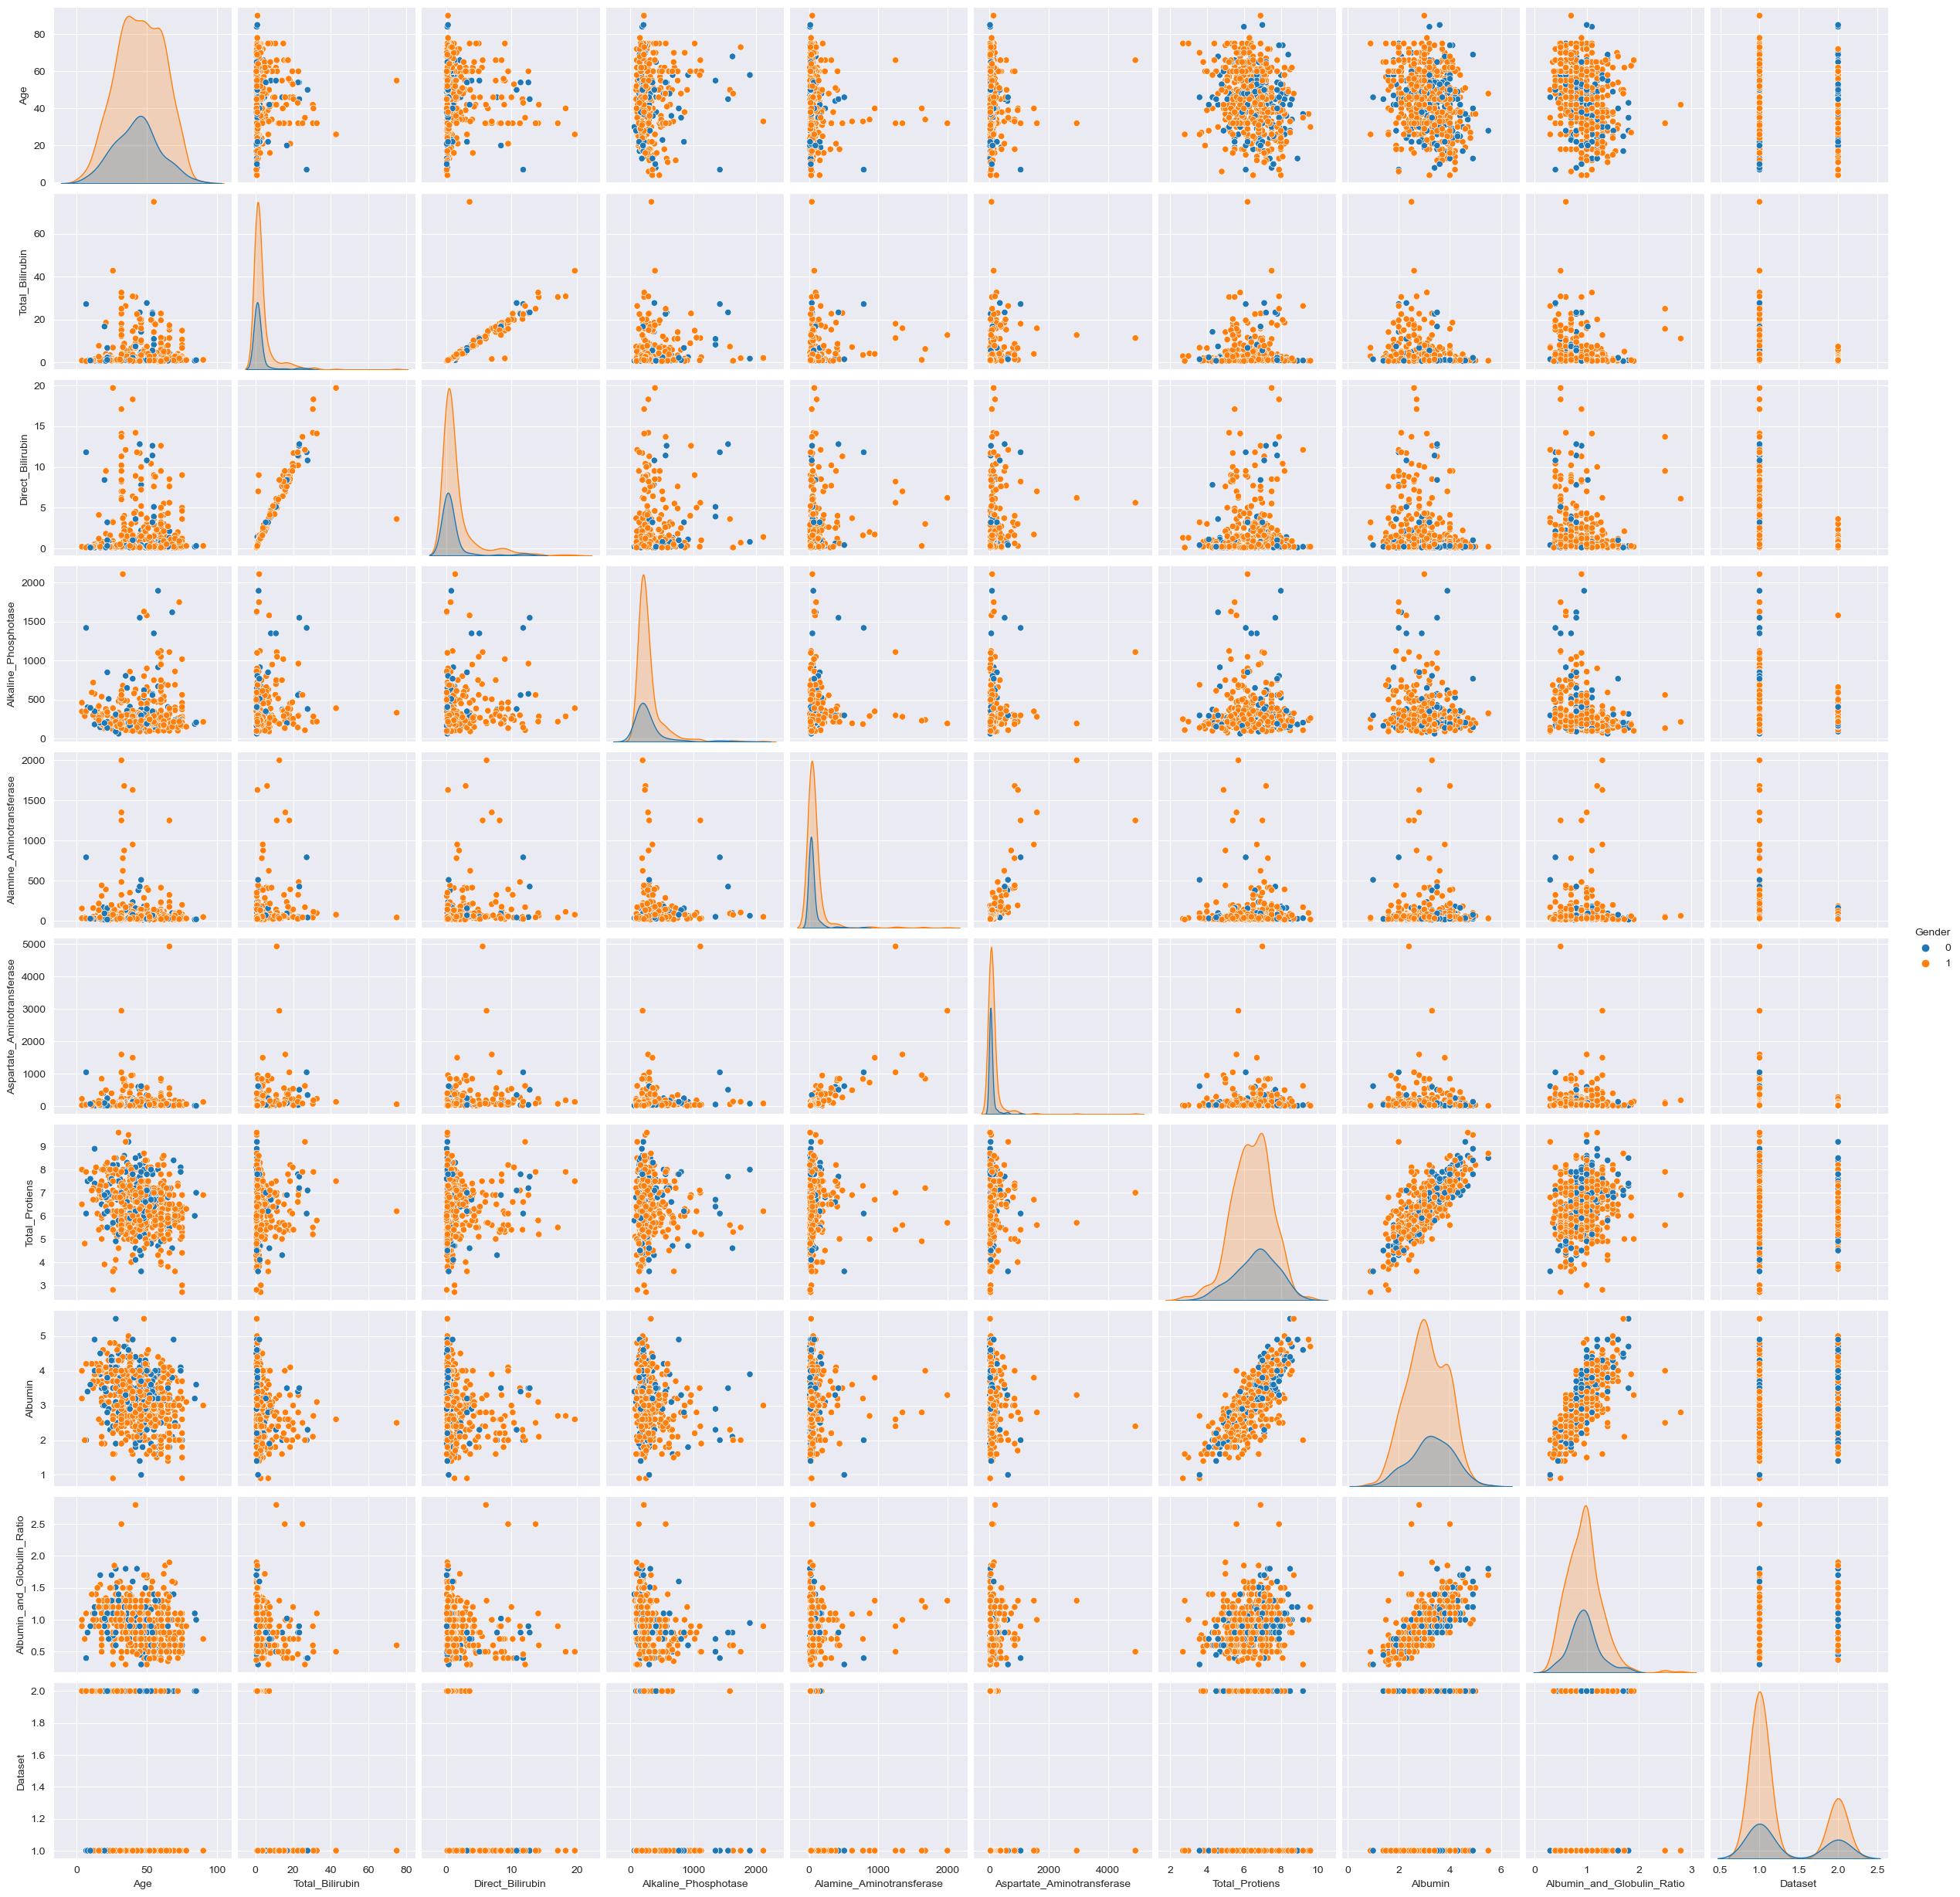

In [45]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

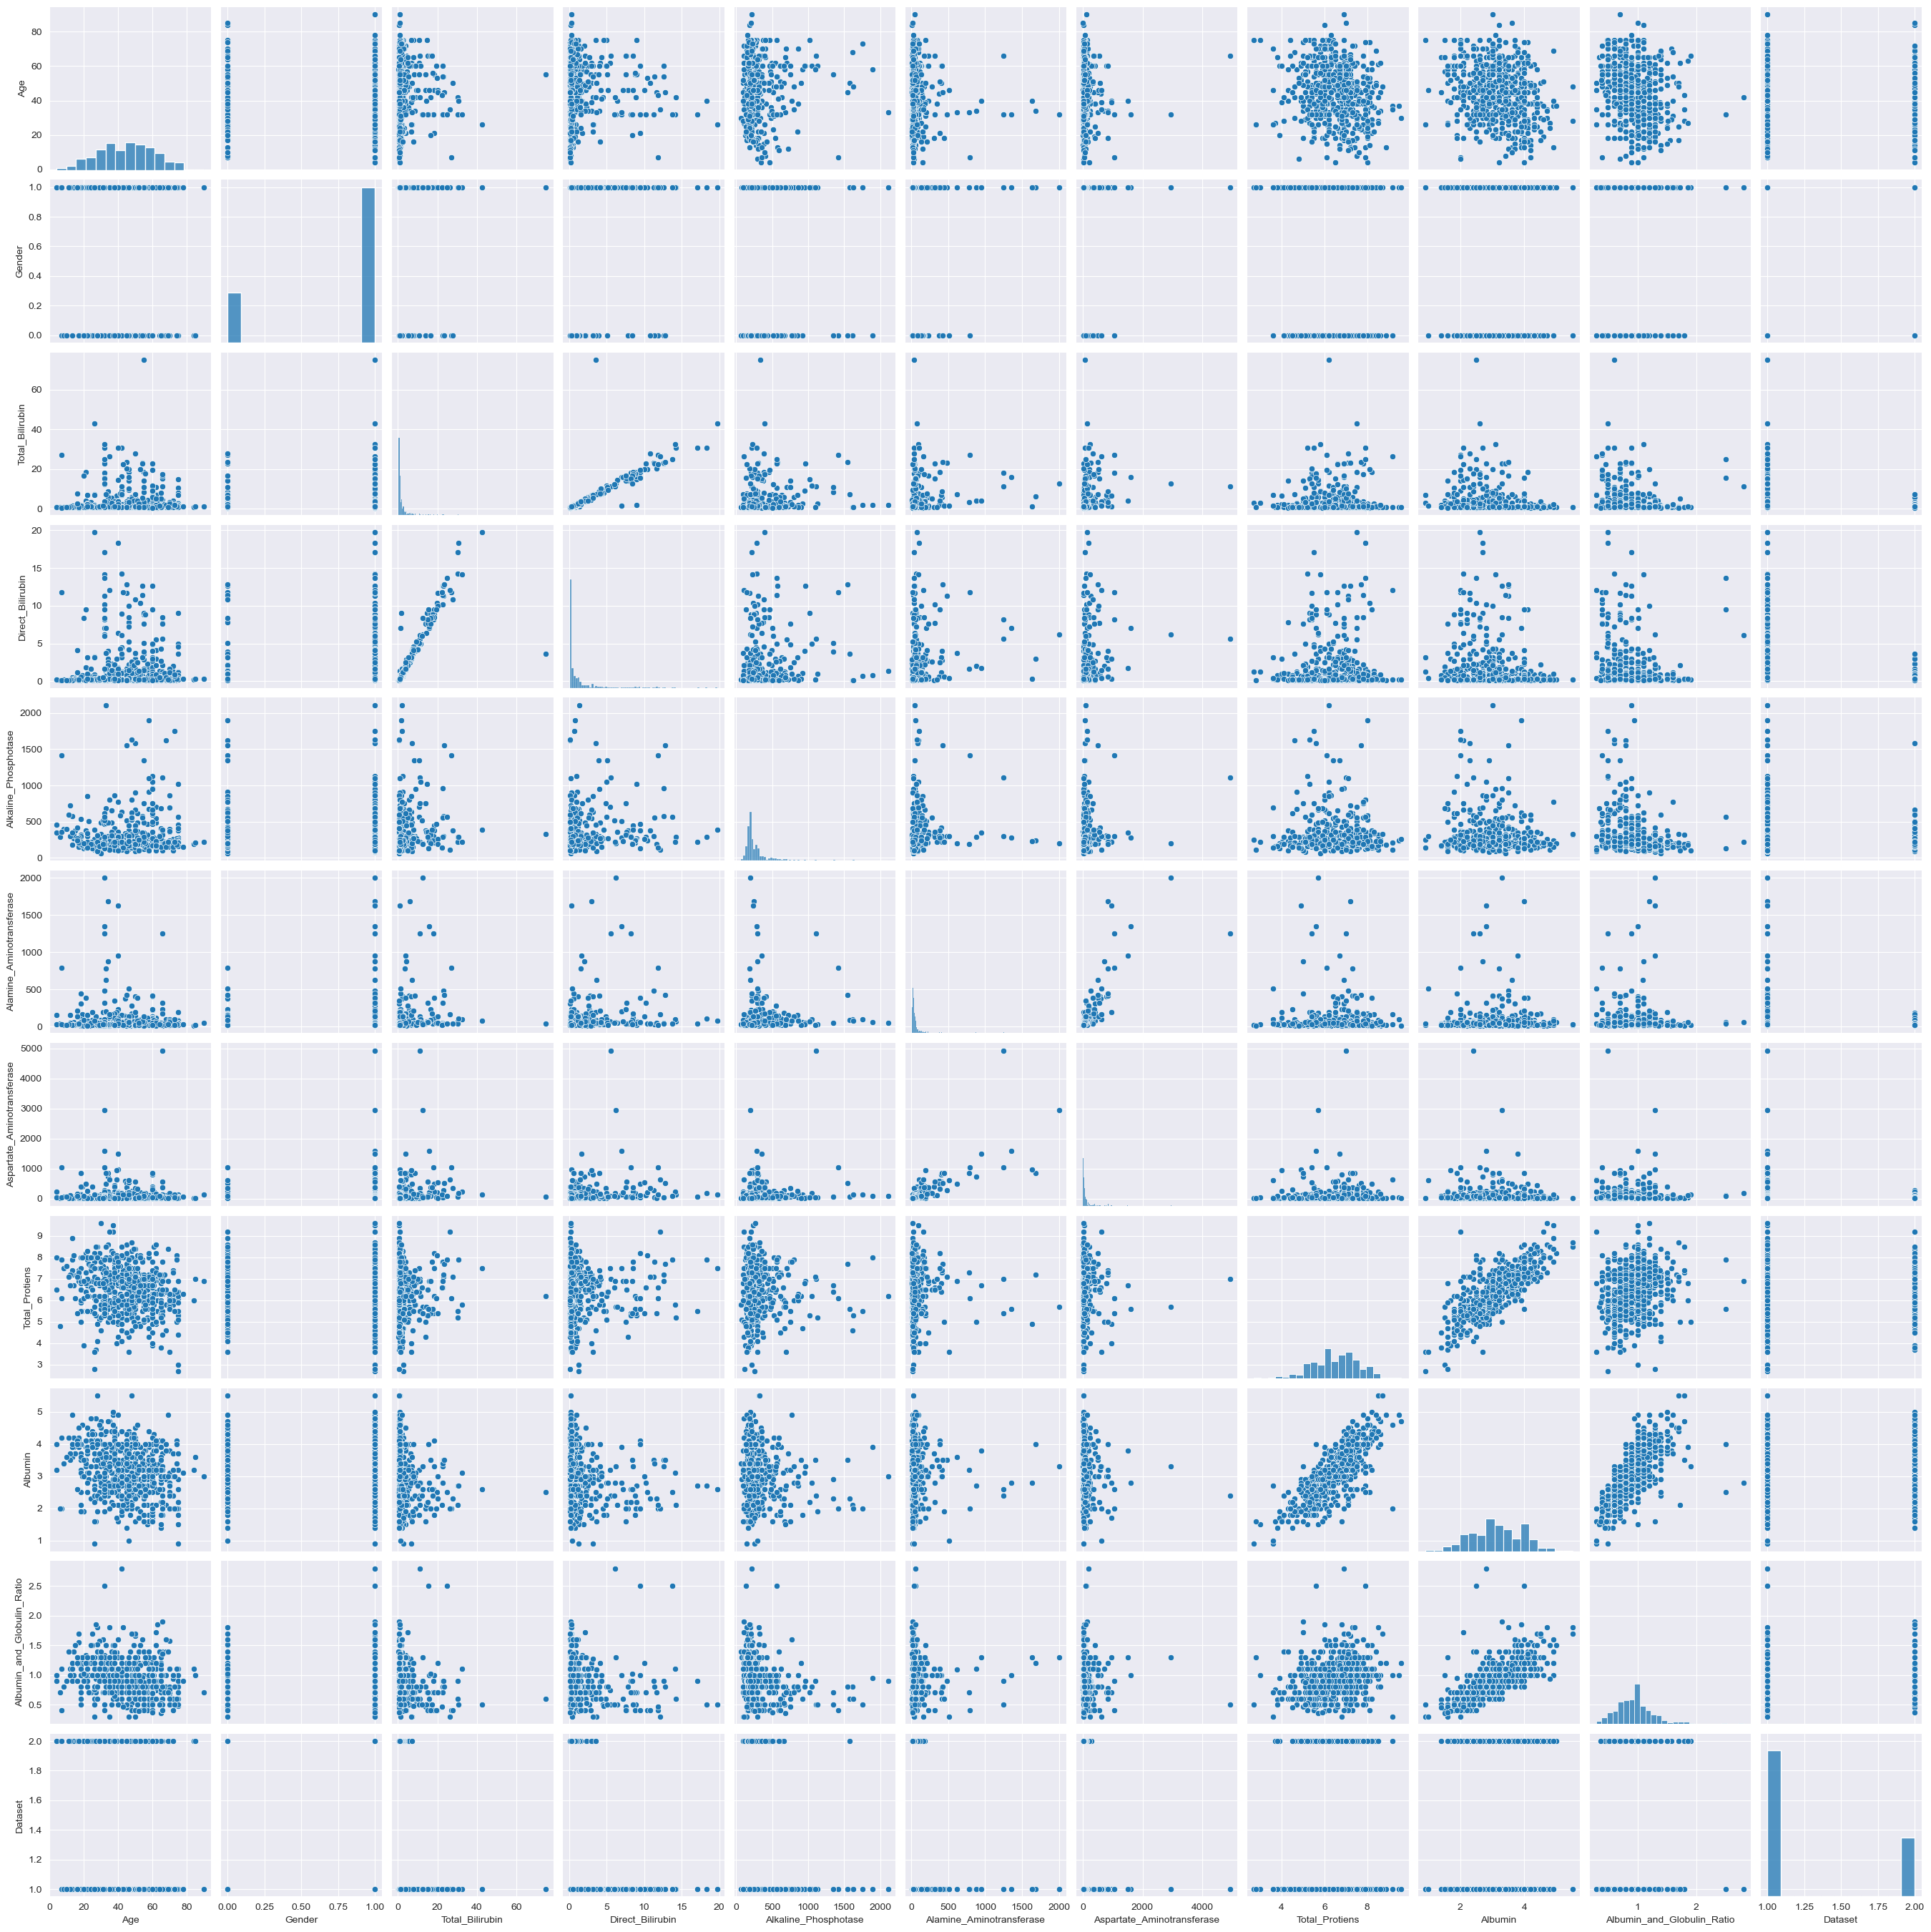

In [46]:
sns.pairplot(patients)

**Let us compare the albumin and albumin and globulin ratio by a scatterplot.**

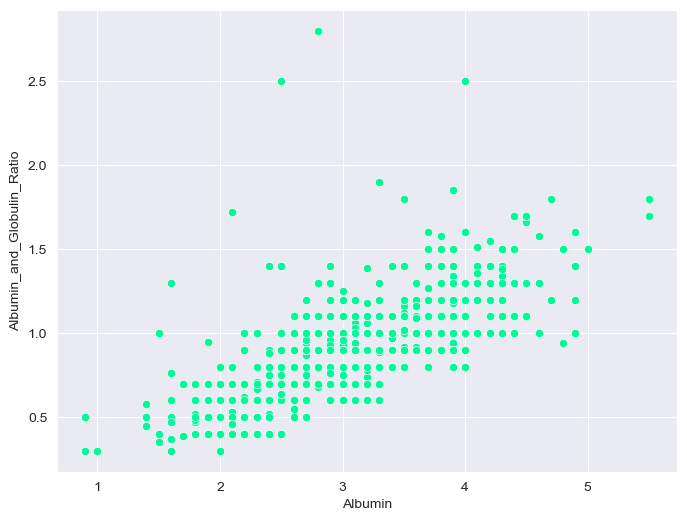

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

**Let us compare the Gender based on the Protein Intake.**

<Axes: xlabel='Gender'>

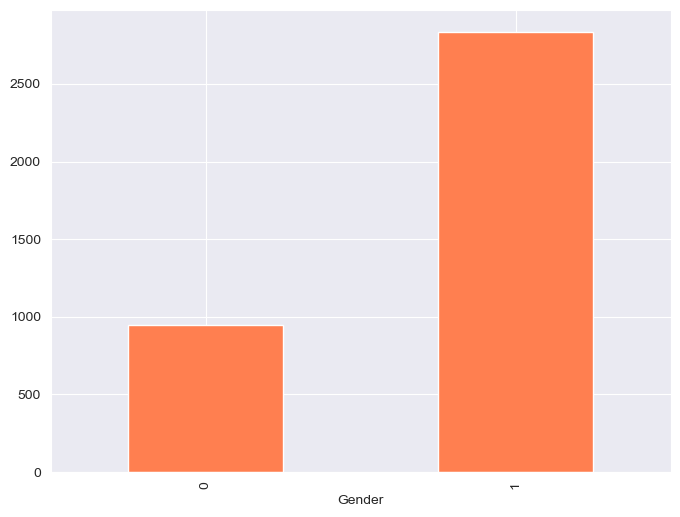

In [48]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

**So protein intake is higher in the case of Male and comparitively less in females.**

**Let us compare male and female based on Albumin Level.**

<Axes: xlabel='Gender'>

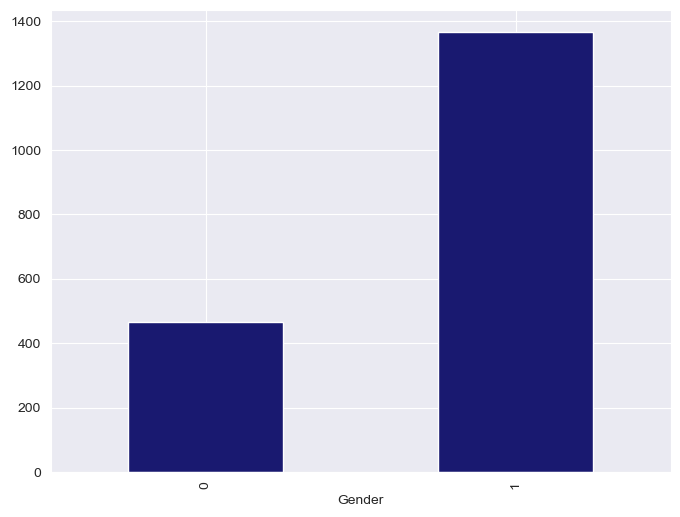

In [49]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

**Albumin Level is higher in the case in the case of male compared to female.**

**Finally Let us compare them based on the Bilirubin content.**

<Axes: xlabel='Gender'>

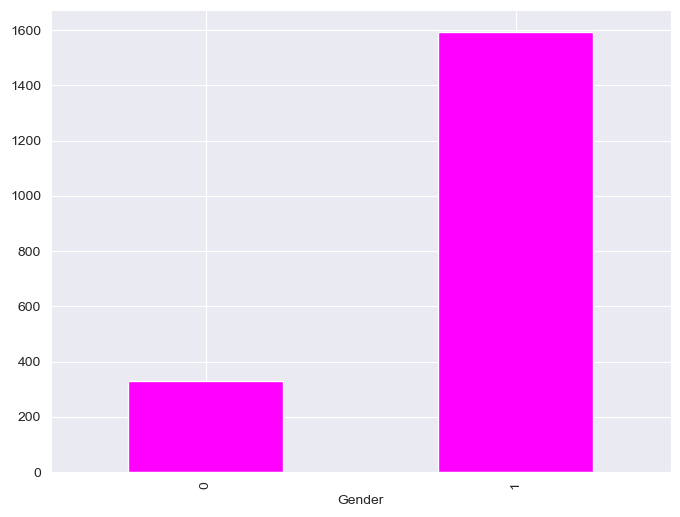

In [50]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

**We can clearly see that males has more bilirubin content compared to females.**

**Let us check the correlation between the features using a heatmap:**

In [51]:
corr=patients.corr()

<Axes: >

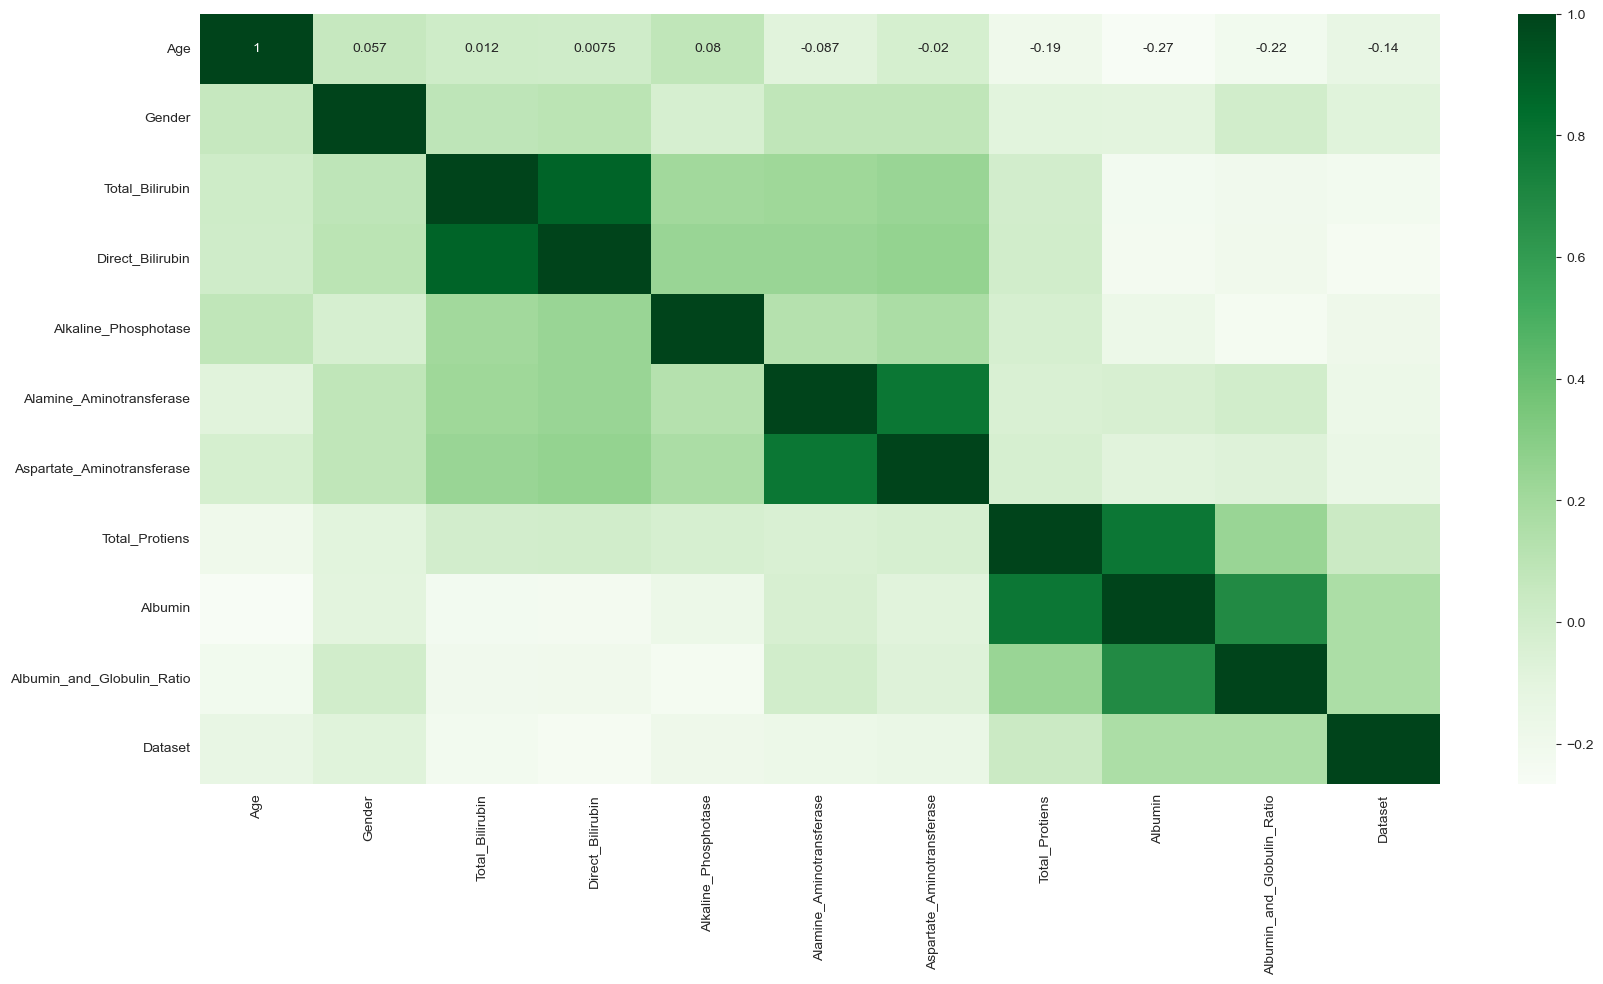

In [52]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

**So Let us start building our model.**

**Inorder to build a successful model we have to train and test the model.**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

**Now let us define our X and y.**

**Here X is our features and y is our target.**

In [55]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

**We split the training and testing  in a certain ratio as 70 for training and 30 for testing.**

**Now inorder to build our model we use Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

**Now, Let us import the cross validation score and Kfold and split them into 5.**

**Finally, we are calculating the accuracy of our model.**

In [60]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=5, shuffle=True)
logmodel = LogisticRegression(C=1, penalty='l2')  # Change penalty to 'l2'
results = cross_val_score(logmodel, X_train, y_train, cv=kfold)
print(results)
print("Accuracy:", results.mean() * 100)


[0.7195122  0.70731707 0.7195122  0.72839506 0.7654321 ]
Accuracy: 72.80337247816922


**Thus we can conclude that our model performed at an accuracy of 71.5%.**

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("liver.csv")

# Separate features and target variable
X = data.drop(columns=['Dataset'])
y = data['Dataset']

# Define column transformer for preprocessing
numeric_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
                    'Albumin', 'Albumin_and_Globulin_Ratio']
categorical_features = ['Gender']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117



In [62]:
import pandas as pd

# Define the new data
new_data = pd.DataFrame({
    'Age': [65],
    'Gender': ['Female'],
    'Total_Bilirubin': [0.7],
    'Direct_Bilirubin': [0.1],
    'Alkaline_Phosphotase': [187],
    'Alamine_Aminotransferase': [16],
    'Aspartate_Aminotransferase': [18],
    'Total_Protiens': [6.8],
    'Albumin': [3.3],
    'Albumin_and_Globulin_Ratio': [0.9]
})

# Make prediction using the pipeline
prediction = pipeline.predict(new_data)

# Print the prediction
print("Liver Disease is", "Present" if prediction[0] == 1 else "Absent")


Liver Disease is Present


In [66]:
import pandas as pd

# Define the new data
new_data = pd.DataFrame({
    'Age': [17],
    'Gender': ['Male'],
    'Total_Bilirubin': [0.9],
    'Direct_Bilirubin': [0.3],
    'Alkaline_Phosphotase': [202],
    'Alamine_Aminotransferase': [22],
    'Aspartate_Aminotransferase': [19],
    'Total_Protiens': [7.4],
    'Albumin': [4.1],
    'Albumin_and_Globulin_Ratio': [1.2]
})

# Make prediction using the pipeline
prediction = pipeline.predict(new_data)

# Print the prediction
print("Liver Disease is", "Present" if prediction[0] == 1 else "Absent")


Liver Disease is Absent
